In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/taehojo/data-ch20.git

Cloning into 'data-ch20'...


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1,)

In [6]:
train_generator = train_datagen.flow_from_directory('./data-ch20/train', target_size=(150,150), batch_size=5, class_mode='binary')

Found 160 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('./data-ch20/test', target_size=(150,150), batch_size=5, class_mode='binary')

Found 120 images belonging to 2 classes.


In [10]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
transfer_model.trainable = False

58889256/58889256 [==============================] - 7s 0us/step


In [11]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 activation_1 (Activation)   (None, 1)                 0

In [13]:
finetune_model.compile(loss='binary_crossentropy', optimizer = optimizers.Adam(learning_rate=0.0002),metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [16]:
history = finetune_model.fit(train_generator, epochs=20, validation_data=test_generator, validation_steps=10, callbacks=[early_stopping_callback])

Epoch 1/20
32/32 [==============================] - 184s 6s/step - loss: 0.7008 - accuracy: 0.5813 - val_loss: 0.5164 - val_accuracy: 0.8200
Epoch 2/20
32/32 [==============================] - 176s 6s/step - loss: 0.5335 - accuracy: 0.7312 - val_loss: 0.4370 - val_accuracy: 0.8800
Epoch 3/20
32/32 [==============================] - 178s 6s/step - loss: 0.4458 - accuracy: 0.8188 - val_loss: 0.4151 - val_accuracy: 0.8400
Epoch 4/20
32/32 [==============================] - 214s 7s/step - loss: 0.4224 - accuracy: 0.8062 - val_loss: 0.3636 - val_accuracy: 0.8200
Epoch 5/20
32/32 [==============================] - 231s 7s/step - loss: 0.3322 - accuracy: 0.8813 - val_loss: 0.3026 - val_accuracy: 0.9400
Epoch 6/20
32/32 [==============================] - 192s 6s/step - loss: 0.3172 - accuracy: 0.8813 - val_loss: 0.3194 - val_accuracy: 0.8800
Epoch 7/20
32/32 [==============================] - 187s 6s/step - loss: 0.2692 - accuracy: 0.9312 - val_loss: 0.2387 - val_accuracy: 0.9600
Epoch 8/20
32

<function matplotlib.pyplot.show(close=None, block=None)>

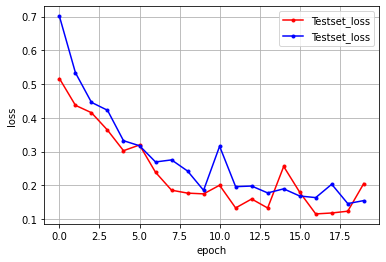

In [18]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Testset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show